In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.simplefilter('ignore')

In [2]:
loan_data_raw = pd.read_csv('prosperLoanData.csv')

In [3]:
loan_data_raw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# Analysis of Peer to Peer Loan Data

## by Louis Neira

### Data provided by Prosper Funding LLC

# 1. Introduction

Loan data from Prosper Financial, a peer-to-peer lender in the United States is analyzed for this project. 

The data set consists of data for 113,397 loans. 81 columns are recorded in the data set and pertain to borrower risk, including amount of delinquent loans at the time of the credit pull, credit ratings, credit grade, and borrower APR. The data set also includes columns for Prosper specific data such as custom ratings and investment from friends. Estimated loss and estimated returns, metrics that are important to investors, are also included in the data set.

To start this analysis, it may be helpful to view basic information about the data, including column names and descriptive statistics. Due to the large size of this data set, it is likely that only a subset of the data will be analyzed. 

In [4]:
loan_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loan_data_raw['EstimatedLoss'].describe()

count    84853.000000
mean         0.080306
std          0.046764
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

In [6]:
loan_data_raw['ProsperPaymentsOneMonthPlusLate'].value_counts()

0.0     21700
1.0       185
2.0        69
3.0        49
4.0        20
7.0        16
5.0        16
6.0         9
8.0         5
11.0        3
21.0        3
19.0        3
9.0         3
12.0        1
10.0        1
18.0        1
16.0        1
Name: ProsperPaymentsOneMonthPlusLate, dtype: int64

In [7]:
loan_data_raw['Occupation'].value_counts()[0:20]

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Name: Occupation, dtype: int64

As there are 81 columns in this data set, a subset of the data will be copied for initial analysis. Below are the columns that we will keep after an initial review of the data.

- AmountDelinquent
- BorrowerAPR
- BorrowerRate
- CreditScoreRangeUpper
- CreditScoreRangeLower
- DebtToIncomeRatio
- EmploymentStatus
- EmploymentStatusDuration
- EstimatedLoss
- EstimatedReturn
- IsBorrowerHomeowner
- LoanOriginalAmount
- Occupation
- PercentFunded
- ProserPaymentsLessThanOneMonthLate
- ProsperPaymentsOneMonthPlusLate
- ProsperPrincipalBorrowed
- ProsperPrincipalOutstanding
- ProsperRating (numeric)
- StatedMonthlyIncome

In [8]:
loan_data = loan_data_raw[['AmountDelinquent', 'BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeUpper', 'CreditScoreRangeLower',
                           'DebtToIncomeRatio', 'EmploymentStatus', 'EmploymentStatusDuration', 
                           'IsBorrowerHomeowner', 'LoanOriginalAmount', 'Occupation', 'PercentFunded', 
                           'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
                           'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 
                           'ProsperRating (numeric)', 'StatedMonthlyIncome', 'EstimatedLoss', 'EstimatedReturn']].copy()

Based on an initial view of the columns, it appears that the columns 'CreditScoreRangeUpper' and 'CreditScoreRangeLower' contain very similar data, likely provide similar information, and likely have a similar impact on other variables of interest. As a result, it may be worthwhile to create another variable that captures information from both of these variables and use that for analysis instead. This is done by creating another variable 'CreditScoreRangeAvg' that is the average of these two variables. In this way, we capture information from both columns while only needing to use one column.

In [9]:
loan_data['CreditScoreRangeAvg'] = 0
loan_data['CreditScoreRangeAvg'] = (loan_data['CreditScoreRangeUpper'] + loan_data['CreditScoreRangeLower']) / 2

In [10]:
loan_data[['CreditScoreRangeAvg', 'CreditScoreRangeUpper', 'CreditScoreRangeLower']].describe()

,CreditScoreRangeAvg,CreditScoreRangeUpper,CreditScoreRangeLower
count,113346.000000,113346.000000,113346.000000
mean,695.067731,704.567731,685.567731
std,66.458275,66.458275,66.458275
min,9.500000,19.000000,0.000000
25%,669.500000,679.000000,660.000000
50%,689.500000,699.000000,680.000000
75%,729.500000,739.000000,720.000000
max,889.500000,899.000000,880.000000


In [11]:
loan_data.drop(columns=['CreditScoreRangeUpper', 'CreditScoreRangeLower'], inplace=True)

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
AmountDelinquent                       106315 non-null float64
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
DebtToIncomeRatio                      105383 non-null float64
EmploymentStatus                       111682 non-null object
EmploymentStatusDuration               106312 non-null float64
IsBorrowerHomeowner                    113937 non-null bool
LoanOriginalAmount                     113937 non-null int64
Occupation                             110349 non-null object
PercentFunded                          113937 non-null float64
ProsperPaymentsLessThanOneMonthLate    22085 non-null float64
ProsperPaymentsOneMonthPlusLate        22085 non-null float64
ProsperPrincipalBorrowed               22085 non-null float64
ProsperPrincipalOutstanding            22085 non-null float64
ProsperRating (num

# 2. Initial Exploration

To start this analysis, it may be helpful to have an overview of several different bivariate plots. The goal is to uncover any interesting bivariate relationships in data, view general distribution patterns, and observe any variables that contain similar information (as shown by a linear relationship) which is an indication of data that can and should be dropped. 

In [13]:
data_vars = ['AmountDelinquent', 'BorrowerAPR', 'BorrowerRate',
                           'DebtToIncomeRatio', 'EstimatedReturn']

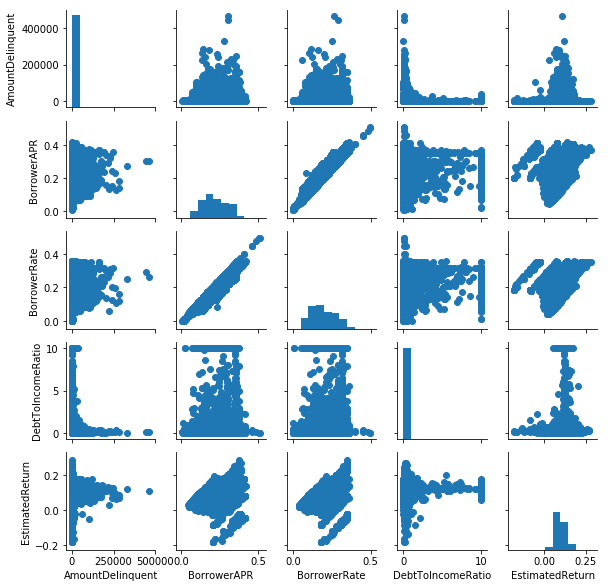

In [14]:
# Slow running operation
g = sns.PairGrid(data = loan_data, vars = data_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
g.fig.set_size_inches(8,8)

Based on the plot matrix, it appears that an abundance of data has made the plots difficult to read due to overlapping. As a result, data will be examined in further detail. However, one obvious trend is that the columns 'BorrowerAPR' and 'BorrowerRate' have a nearly linear slope, meaning that they contain very similar data. Because of this, one of the columns should be dropped. As APR typically encompasses all borrowing costs that are not necessarily reflected in a borrower's rate, it appears to be a more accurate measure of borrowing costs; therefore the 'BorrowerAPR' column will be kept. The 'BorrowerRate' column will be dropped.

In [15]:
loan_data.drop(columns='BorrowerRate', inplace=True)

# 3. Homeownership and Estimated Return

For some individuals, a significant source of net worth is the value of a home, so it is worth exploring if there is a relationship between homeownership and estimated returns on loans. Do loans to homeowners make for a better return on investment than loans to individuals who do not own a home?

Data in this section are also analyzed regarding debt to income ratio to search for any influence of this factor on the impact of homeownership on estimated rates of return.

In [16]:
loan_data_home_owner = loan_data.copy()
loan_data_home_owner = loan_data_home_owner[loan_data_home_owner['AmountDelinquent'] > 0]
loan_data_home_owner = loan_data_home_owner[['AmountDelinquent', 'DebtToIncomeRatio', 'IsBorrowerHomeowner', 'EstimatedReturn']]

The following scatterplots show the relationship between homeownership and estimated return. The scatterplots do not appear to reveal any significant correlation between these data. Summary statistics grouped by homeownship show that the two groups have very similar mean estimated rates of return. This is consistent with our plots in not showing an obvious difference in estimated return for homeowners compared to non-homeowners.

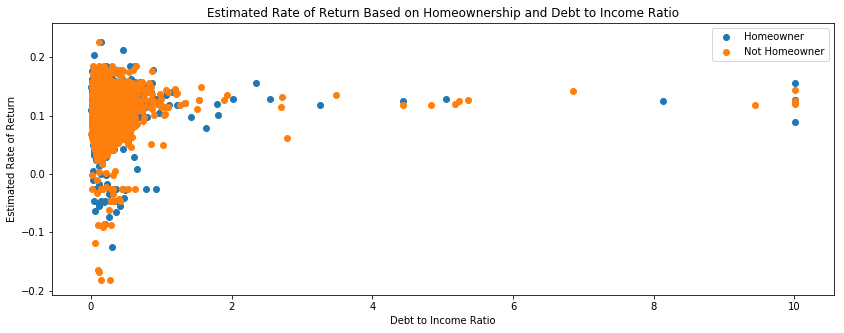

In [17]:
# YOUR CODE HERE
plt.figure(figsize=(14,5))
types = ['Homeowner', 'Not Homeowner']

for truth in [True, False]:
    plt.scatter(data = (loan_data_home_owner[loan_data_home_owner['IsBorrowerHomeowner'] == truth]), x='DebtToIncomeRatio', y='EstimatedReturn')

plt.title('Estimated Rate of Return Based on Homeownership and Debt to Income Ratio')
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Estimated Rate of Return")
plt.legend(types);

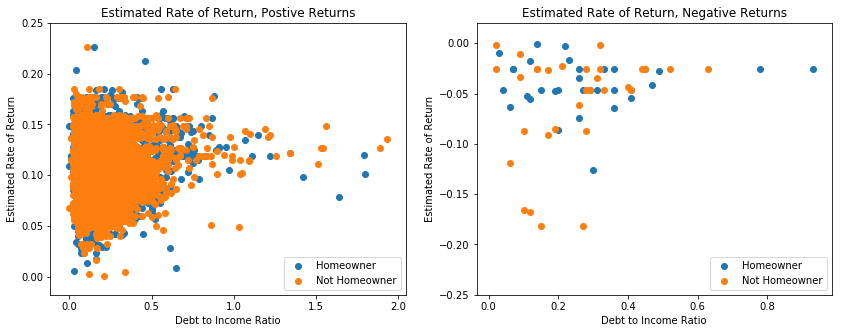

In [18]:
# Create Subplots
f, axes = plt.subplots(1,2, figsize=(14,5))
types = ['Homeowner', 'Not Homeowner']

# Subplot 1 - Scatter data for estimated returns greater than zero
ax1 = plt.subplot(121)
for truth in [True, False]:
    ax1.scatter(data = loan_data_home_owner[(loan_data_home_owner['EstimatedReturn'] >= 0) & (loan_data_home_owner['DebtToIncomeRatio'] <= 2) & (loan_data_home_owner['IsBorrowerHomeowner'] == truth)], x='DebtToIncomeRatio', y='EstimatedReturn')
plt.legend(types, loc=4)
plt.xticks(np.arange(0, 2.5, 0.5))
plt.title('Estimated Rate of Return, Postive Returns')
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Estimated Rate of Return")

# Subplot 2 - Scatter data for estimated returns less than zero
ax2 = plt.subplot(122)
for truth in [True, False]:
    ax2.scatter(data = loan_data_home_owner[(loan_data_home_owner['EstimatedReturn'] < 0) & (loan_data_home_owner['IsBorrowerHomeowner'] == truth)], x='DebtToIncomeRatio', y='EstimatedReturn')
plt.legend(types, loc=4)
plt.yticks(np.arange(-0.25, 0.05, 0.05))
plt.title('Estimated Rate of Return, Negative Returns')
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Estimated Rate of Return");

In [19]:
loan_data_home_owner['IsBorrowerHomeowner'].value_counts()

True     8269
False    8228
Name: IsBorrowerHomeowner, dtype: int64

In [20]:
loan_data_home_owner.groupby(['IsBorrowerHomeowner']).mean()

,AmountDelinquent,DebtToIncomeRatio,EstimatedReturn
IsBorrowerHomeowner,,,
False,4387.419665,0.245666,0.106187
True,8292.197243,0.247938,0.106379


# 4. Debt to Income Ratio 

The debt to income ratio is an important metric to measure risk to a bank or other borrowing institution of default. First, the debt to income ratio data are analyzed and plotted to view general trends about the debt to income ratio of Prosper Funding borrowers.

## A. Distribution of Loans by Debt to Income Ratio

The first portion of this analysis examines the distribution of loans based on debt to income ratio.

In [21]:
# Confirm that we do not have null or infinite data in the specified columns
loan_data.dropna(subset=['DebtToIncomeRatio', 'AmountDelinquent'], inplace=True)
(loan_data['DebtToIncomeRatio'].isin([np.inf, -np.inf])).sum(), loan_data['DebtToIncomeRatio'].isna().sum()

(0, 0)

Some data points did not provide a debt to income ratio and were thus dropped from further analysis for debt to income ratio. Below is an analysis of the data for which there is debt to income ratio information.

In [22]:
loan_data['DebtToIncomeRatio'].describe()

count    97905.000000
mean         0.276037
std          0.524517
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

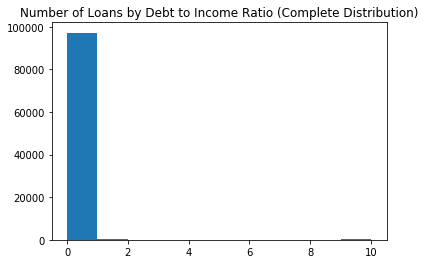

In [23]:
loan_data['DebtToIncomeRatio'].hist();
plt.grid(False)
plt.title('Number of Loans by Debt to Income Ratio (Complete Distribution)');

In [24]:
debt_ratio_greater_than_1_sum = loan_data[loan_data['DebtToIncomeRatio'] > 1]['DebtToIncomeRatio'].value_counts().sum() 
print('Number of loans and percent of loans with a Debt to Income Ratio greater than 1.0: ' + repr(debt_ratio_greater_than_1_sum) + ', ' + '{0:.2f}'.format(debt_ratio_greater_than_1_sum / len(loan_data['DebtToIncomeRatio'])) + '%')

Number of loans and percent of loans with a Debt to Income Ratio greater than 1.0: 674, 0.01%


The following slide shows the histogram for debt to income ratio. It is apparent that the vast majority of the loans (over 90,000 based on the above plot out of 97,905 for which there is debt to income ratio information) are given to borrowers with a debt to income ratio of 1 or less. A significant amount of borrowers have a debt to income ratio between 0.10 and 0.30, with the amount of borrowers with higher ratios trailing off significantly after approximately 0.30.

Because more than 99.9% of loans contain a debt to income ratio less than or equal to 1, further analysis will be focused on this portion of the distribution.

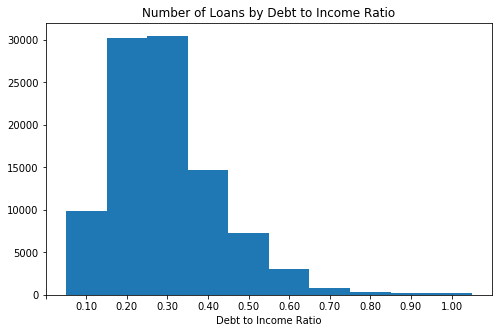

In [25]:
subplot = plt.figure(figsize = (8,5))

bins = np.arange(0, 1.05, .1)

ax = plt.subplot(1,1,1)

ax = loan_data['DebtToIncomeRatio'].hist(bins = bins)

bin_labels = ["{:0.2f}".format(i) for i in bins]
bin_labels[0] = ""

ax.set_xticks(bins - 0.05);
ax.set_xticklabels(bin_labels)

ax.grid(False)

ax.set_title('Number of Loans by Debt to Income Ratio')
ax.set_xlabel('Debt to Income Ratio');

## B. Examining Debt to Income Ratio and Delinquent Payment Amounts

Based on the plot matrix, debt to income ratio appears to have an interesting relationship with the amount delinquent and is worth investigating with bivariate plots.

In [26]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97905 entries, 0 to 113936
Data columns (total 18 columns):
AmountDelinquent                       97905 non-null float64
BorrowerAPR                            97905 non-null float64
DebtToIncomeRatio                      97905 non-null float64
EmploymentStatus                       97905 non-null object
EmploymentStatusDuration               97888 non-null float64
IsBorrowerHomeowner                    97905 non-null bool
LoanOriginalAmount                     97905 non-null int64
Occupation                             96572 non-null object
PercentFunded                          97905 non-null float64
ProsperPaymentsLessThanOneMonthLate    19915 non-null float64
ProsperPaymentsOneMonthPlusLate        19915 non-null float64
ProsperPrincipalBorrowed               19915 non-null float64
ProsperPrincipalOutstanding            19915 non-null float64
ProsperRating (numeric)                77557 non-null float64
StatedMonthlyIncome          

In [27]:
loan_data['DebtToIncomeRatio'].describe()

count    97905.000000
mean         0.276037
std          0.524517
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [28]:
loan_data['AmountDelinquent'].describe()

count     97905.000000
mean       1003.278556
std        7154.286296
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

In [29]:
loan_data[loan_data['AmountDelinquent'] > 0]['AmountDelinquent'].count()

15525

### 1. Scatter Plots

The following plot, which shows the total amount of delinquent payments for borrowers with delinquent loans (and excludes data for borrowers who did not have delinquent loans), shows that borrowers with lower debt to income ratios tend to have higher delinquent loan amounts when the credit report is pulled.

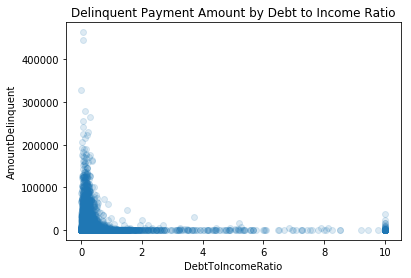

In [30]:
sns.regplot(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', fit_reg=False, scatter_kws = {'alpha': 0.15})
plt.title('Delinquent Payment Amount by Debt to Income Ratio');

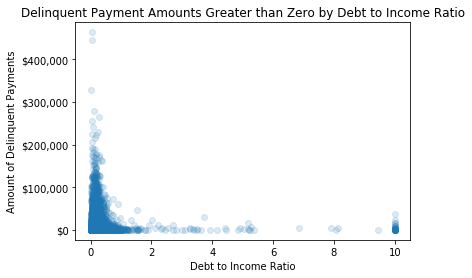

In [31]:
g = sns.regplot(data = loan_data[loan_data['AmountDelinquent'] > 0], x = 'DebtToIncomeRatio', y = 'AmountDelinquent', fit_reg=False, scatter_kws = {'alpha': 0.15})
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Amount of Delinquent Payments')
y_ticklabels = ['${:,.0f}'.format(t) for t in g.get_yticks()]
locs, labels = plt.yticks()
g.set(yticklabels=y_ticklabels)
plt.title('Delinquent Payment Amounts Greater than Zero by Debt to Income Ratio');

### 2. Heat Maps

Due to the clustered distribution of the debt to income and delinquent loan amount data, it will be worth examining a smaller range of the data. Heat maps can help pinpoint which parts of the data to focus on. 

In [32]:
debt_ratio_step = 0.1
amt_del_step = 50000

In [33]:
debt_ratio_bins = np.arange(-0.1, loan_data['DebtToIncomeRatio'].max() + debt_ratio_step, debt_ratio_step)
delinquent_bins = np.arange(-0.1, loan_data['AmountDelinquent'].max() + amt_del_step, amt_del_step)

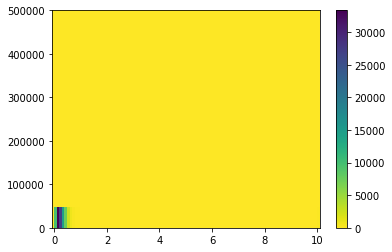

In [34]:
plt.hist2d(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], cmap='viridis_r');
plt.colorbar();

In [35]:
debt_ratio_bins = np.arange(-0.1, 1.5, 0.3)
delinquent_bins = np.arange(-0.1, 500000, 50000)

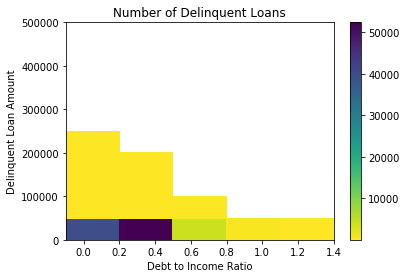

In [36]:
plt.hist2d(data = loan_data, x = 'DebtToIncomeRatio', y = 'AmountDelinquent', bins=[debt_ratio_bins, delinquent_bins], cmap='viridis_r', cmin=5);
plt.title('Number of Delinquent Loans')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Delinquent Loan Amount')
cbar = plt.colorbar();

The heat map in the previous slide shows that a vast majority of borrowers with delinquent loans are borrowers with debt to income ratios under 0.5 and delinquent loan amounts under 250,000. 

### 2. Further Examination of Debt to Income and Delinquent Payment Amount 

In [37]:
# Subsets of loan data

# This subset contains all loans with a delinquent amount less than or equal to $250,000 and a debt to income ratio less than or equal to 0.50 
loan_data_sub = loan_data[(loan_data['AmountDelinquent'] <= 250000) & (loan_data['DebtToIncomeRatio'] >= 0) & (loan_data['DebtToIncomeRatio'] <= .50)].copy()

# This subset contains delinquent loans with a delinquent amount less than or equal to $250,000 and a debt to income ratio less than or equal to 0.50
loan_data_delinquent = loan_data[(loan_data['AmountDelinquent'] > 0) & (loan_data['AmountDelinquent'] < 250001) & (loan_data['DebtToIncomeRatio'] >= 0) & (loan_data['DebtToIncomeRatio'] < .51)].copy()

In [38]:
len(loan_data_sub), len(loan_data_delinquent)

(93043, 14925)

In [39]:
# Percent of delinquent loans covered by subset of data
# (less than or equal to $250,000 and debt to income ratio less than or equal to 0.5)
loan_data_delinquent['AmountDelinquent'].sum() / loan_data['AmountDelinquent'].sum()

0.9561889563909396

In [40]:
debt_ratio_step = .1
amt_del_step = 50000

In [41]:
def create_bin_indices(df, columns, steps):
    
    bins = []
    indices = []
    
    for s in range(0, len(steps)):
        b = np.arange(df[columns[s]].min(), df[columns[s]].max() + steps[s], steps[s])
        bins.append(b)
        
        i = pd.cut(df[columns[s]], bins[s], labels=False, include_lowest = True).astype(int)
        indices.append(i)
        
    return bins, indices

In [42]:
def add_bins_to_dataframe(df, indices, operation, new_col_names):
    
    if (operation == 'sum'):
        df_groupby = df.groupby(indices).sum()
        
    elif (operation == 'mean'):
        df_groupby = df.groupby(indices).mean()
        
    elif (operation == 'proportion'):
        df_groupby_sum = df.groupby(indices).sum()
        df_groupby_count = df.groupby(indices).count()
        df_groupby = df_groupby_sum / df_groupby_count
    
    else:
        df_groupby = df.groupby(indices).count()

    df_groupby.index.set_names(new_col_names, inplace=True)
    df_groupby = df_groupby.reset_index()
    
    return df_groupby

In [43]:
bin_list, index_list = create_bin_indices(loan_data_sub, ['DebtToIncomeRatio'], [debt_ratio_step])
loan_data_count = add_bins_to_dataframe(loan_data_sub, index_list, 'count', ['DebtRatioBin'])

In [44]:
bin_list_del, index_list_del = create_bin_indices(loan_data_delinquent, ['DebtToIncomeRatio'], [debt_ratio_step])
loan_data_del_count = add_bins_to_dataframe(loan_data_delinquent, index_list, 'count', ['DebtRatioBin'])

In [45]:
loan_data_prop = loan_data_count.copy()
loan_data_prop['AmountDelinquent'] = loan_data_del_count['AmountDelinquent'] / loan_data_count['AmountDelinquent']

The following plot shows the total number of loans given. The highest number of loans were given to borrowers with a debt to income ratio between 0.11 and 0.20.

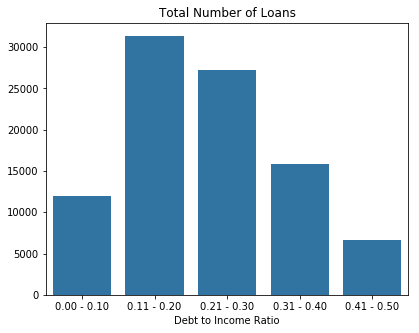

In [46]:
plt.figure(figsize=(6.5,5))
    
x_labels = []
legend_labels = []
x = 'DebtRatioBin'
bins = bin_list


g = sns.barplot(data=loan_data_count, x='DebtRatioBin', y='AmountDelinquent', ci=None, color = sns.color_palette()[0]);
#g.legend(loc=1)
    
# Create labels for Debt to Income Ratio ranges along x-axis
for i in range(loan_data_count[x].min(), loan_data_count[x].max() + 1):
        
    if i == loan_data_count[x].min():
        label_min = bins[0][i]
    else:
        label_min = bins[0][i] + 0.01
            
    label_max = bins[0][i + 1]
    label = str('{0:.2f}'.format(label_min)) + ' - ' + str('{0:.2f}'.format(label_max))
    x_labels.append(label)
    
g.set(title='Total Number of Loans')
g.set(xticklabels=x_labels);
g.set(xlabel='Debt to Income Ratio', ylabel="");

The following bar graphs show a breakdown of delinquent loans by debt to income ratio. The distribution of delinquent loans for borrowers when their credit was pulled mirrors the distribution of the total number of loans as shown in the previous bar graph. Loans with a debt to income ratio between 0.11 and 0.20 had the highest number of delinquent loans, which is expected as this debt to income ratio range also had the highest number of loans overall. 
While borrowers with a debt to income ratio range of 0.11-0.20 had the highest overall number of delinquent loans, the group with the highest proportion of borrowers with delinquent loans is borrowers with debt to income ratios of under 0.10.

It will be worthwhile to examine if loans in this income range also have a higher overall delinquent loan amounts at the time the credit profile is pulled.

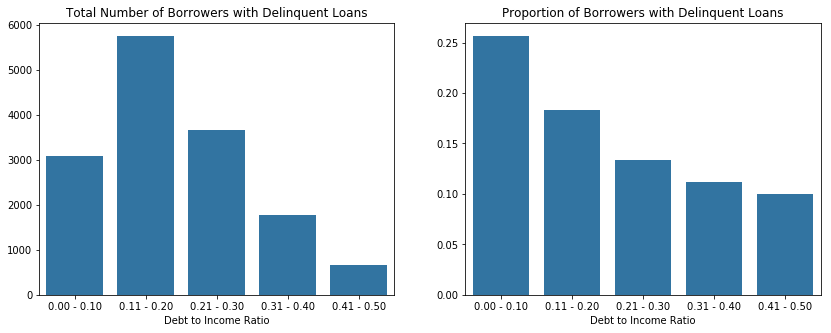

In [47]:
f, axes = plt.subplots(1,2, figsize=(14,5))
    
x_labels = []
legend_labels = []
x = 'DebtRatioBin'
bins = bin_list

ax1 = sns.barplot(data=loan_data_del_count, x='DebtRatioBin', y='AmountDelinquent', ci=None, color = sns.color_palette()[0], ax=axes[0]);
#g.legend(loc=1)
    
# Create labels for Debt to Income Ratio ranges along x-axis
for i in range(loan_data_del_count[x].min(), loan_data_del_count[x].max() + 1):
        
    if i == loan_data_del_count[x].min():
        label_min = bins[0][i]
    else:
        label_min = bins[0][i] + 0.01
            
    label_max = bins[0][i + 1]
    label = str('{0:.2f}'.format(label_min)) + ' - ' + str('{0:.2f}'.format(label_max))
    x_labels.append(label)
    
# Modify labels so they show commas and whole numbers
#y_labels = ['{:,.2f}'.format(t) for t in g.get_yticks()]  
    
ax1.set(title='Total Number of Borrowers with Delinquent Loans')
ax1.set(xticklabels=x_labels);
ax1.set(xlabel='Debt to Income Ratio', ylabel='');



ax2 = sns.barplot(data=loan_data_prop, x='DebtRatioBin', y='AmountDelinquent', ci=None, color = sns.color_palette()[0], ax=axes[1]);
#g.legend(loc=1)
    
# Create labels for Debt to Income Ratio ranges along x-axis
for i in range(loan_data_prop[x].min(), loan_data_prop[x].max() + 1):
        
    if i == loan_data_prop[x].min():
        label_min = bins[0][i]
    else:
        label_min = bins[0][i] + 0.01
            
    label_max = bins[0][i + 1]
    label = str('{0:.2f}'.format(label_min)) + ' - ' + str('{0:.2f}'.format(label_max))
    x_labels.append(label)
    
# Modify labels so they show commas and whole numbers
y_labels = ['${:,.2f}'.format(t) for t in g.get_yticks()]  
    
ax2.set(title='Proportion of Borrowers with Delinquent Loans')
ax2.set(xticklabels=x_labels);
ax2.set(xlabel='Debt to Income Ratio', ylabel='');

In [48]:
bin_list, index_list = create_bin_indices(loan_data_sub, ['DebtToIncomeRatio'], [debt_ratio_step])
loan_data_sum = add_bins_to_dataframe(loan_data_sub, index_list, 'sum', ['DebtRatioBin'])

In [49]:
loan_data_mean = add_bins_to_dataframe(loan_data_sub, index_list, 'mean', ['DebtRatioBin'])

While borrowers in the debt to income ratio range of 0.11-0.20 overall had the largest dollar amount of delinquent loans, borrowers with a debt to income ratio of 0.10 or less had the highest average delinquent payment amount per borrower. This is similar to the pattern previously observed when comparing the number of delinquent loans to the proportion of delinquent loans by debt to income ratios. The average delinquent payment amount for borrowers with a debt to income ratio of 0.10 or less is roughly double the amount of borrowers with a debt to income ratio of 0.11-0.20.

Overall, preliminary observations show that borrowers with a debt to income ratio of 0.10 or less are more likely to have delinquent payments and have higher amounts of delinquent payments per borrower. This is logical, as banks would prefer borrowers to have low debt and higher income, particularly if their credit report shows delinquent loans.

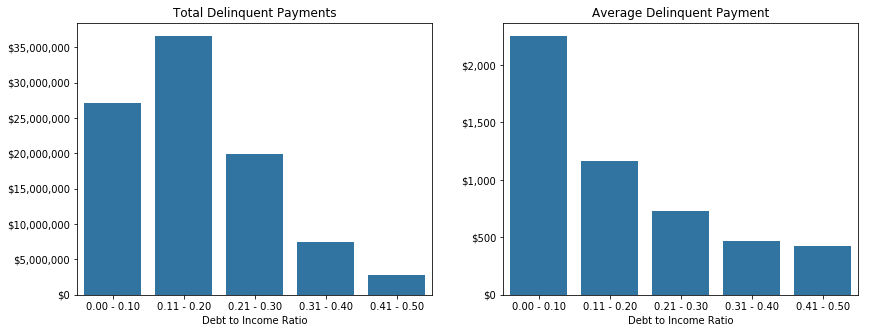

In [50]:
f, axes = plt.subplots(1,2, figsize=(14,5))
    
x_labels = []
legend_labels = []
x = 'DebtRatioBin'
bins = bin_list


ax1 = sns.barplot(data=loan_data_sum, x='DebtRatioBin', y='AmountDelinquent', ci=None, color = sns.color_palette()[0], ax=axes[0]);
#g.legend(loc=1)
    
# Create labels for Debt to Income Ratio ranges along x-axis
for i in range(loan_data_sum[x].min(), loan_data_sum[x].max() + 1):
        
    if i == loan_data_sum[x].min():
        label_min = bins[0][i]
    else:
        label_min = bins[0][i] + 0.01
            
    label_max = bins[0][i + 1]
    label = str('{0:.2f}'.format(label_min)) + ' - ' + str('{0:.2f}'.format(label_max))
    x_labels.append(label)
    
# Modify labels so they show commas and whole numbers
y_labels = ['${:,.0f}'.format(tick) for tick in ax1.get_yticks()]  
    
ax1.set(title='Total Delinquent Payments')
ax1.set(xticklabels=x_labels, yticklabels=y_labels);
ax1.set(xlabel='Debt to Income Ratio', ylabel='');

    
ax2 = sns.barplot(data=loan_data_mean, x='DebtRatioBin', y='AmountDelinquent', ci=None, color = sns.color_palette()[0], ax=axes[1]);
#g.legend(loc=1)
    
# Create labels for Debt to Income Ratio ranges along x-axis
for i in range(loan_data_mean[x].min(), loan_data_mean[x].max() + 1):
        
    if i == loan_data_mean[x].min():
        label_min = bins[0][i]
    else:
        label_min = bins[0][i] + 0.01
            
    label_max = bins[0][i + 1]
    label = str('{0:.2f}'.format(label_min)) + ' - ' + str('{0:.2f}'.format(label_max))
    x_labels.append(label)
    
# Modify labels so they show commas and whole numbers
y_labels = ['${:,.0f}'.format(tick) for tick in ax2.get_yticks()]  
    
ax2.set(title='Average Delinquent Payment')
ax2.set(xticklabels=x_labels, yticklabels=y_labels);
ax2.set(xlabel='Debt to Income Ratio', ylabel='');

In [51]:
loan_data_return = loan_data_sub[['DebtToIncomeRatio', 'AmountDelinquent', 'EstimatedReturn']].copy()

In [52]:
loan_data_return = loan_data_return.dropna(subset=['EstimatedReturn'])
loan_data_return.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74125 entries, 1 to 113936
Data columns (total 3 columns):
DebtToIncomeRatio    74125 non-null float64
AmountDelinquent     74125 non-null float64
EstimatedReturn      74125 non-null float64
dtypes: float64(3)
memory usage: 2.3 MB


In [53]:
bin_list_returns, index_list_returns = create_bin_indices(loan_data_return, ['DebtToIncomeRatio', 'AmountDelinquent'], [debt_ratio_step, amt_del_step])

In [54]:
loan_data_ret_mean = add_bins_to_dataframe(loan_data_return, index_list_returns, 'mean', ['DebtRatioBin', 'AmtDelinquentBin'])

In [55]:
loan_data_ret_mean

,DebtRatioBin,AmtDelinquentBin,DebtToIncomeRatio,AmountDelinquent,EstimatedReturn
0,0,0,0.072615,1279.651598,0.093647
1,0,1,0.064068,71071.271186,0.106789
2,0,2,0.069524,119413.047619,0.106288
3,0,3,0.066667,174903.833333,0.116438
4,0,4,0.056667,224442.666667,0.100700
5,1,0,0.157565,691.150040,0.092677
6,1,1,0.154079,66967.986842,0.103236
7,1,2,0.153714,121845.914286,0.090222
8,1,3,0.146667,170747.666667,0.102678
9,1,4,0.160000,219526.500000,0.081300


In [56]:
def bivar_binned_barplot(df, x, hue, y, bins, chart_title, xlabel, ylabel, legend_title):
    
    plt.figure(figsize=(10,5))
    
    x_labels = []
    legend_labels = []
    
    hue_order =  np.arange(df[hue].min(), df[hue].max() + 1)
    
    g = sns.barplot(data=df, x=x, hue=hue, y=y, ci=None);
    g.legend(loc=1)
    
    # Create labels for Debt to Income Ratio ranges along x-axis
    for i in range(df[x].min(), df[x].max() + 1):
        
        if i == df[x].min():
            label_min = bins[0][i]
        else:
            label_min = bins[0][i] + 0.01
            
        label_max = bins[0][i + 1]
        label = str('{0:.2f}'.format(label_min)) + ' - ' + str('{0:.2f}'.format(label_max))
        x_labels.append(label)
    
    # Modify labels so they show commas and whole numbers
    
    y_labels = [('{:,.0f}'.format(t * 100) + '%') for t in g.get_yticks()]  
    
    # Create labels for Amount Delinquent ranges for legend (Hue variable)
    for i in range(df[hue].min(), df[hue].max() + 1):
        if i == df[hue].min():
            label_min = bins[1][i]
        else: 
            label_min = bins[1][i] + 1   
        label_max = bins[1][i + 1]
        label = str('{:,.0f}'.format(label_min)) + ' - ' + str('{:,.0f}'.format(label_max))
        legend_labels.append(label)
    
    g.set(title=chart_title)
    g.set(xticklabels=x_labels, yticklabels=y_labels)
    g.set(xlabel=xlabel, ylabel=ylabel)
    plt.legend(legend_labels, loc=4, title=legend_title, framealpha=1);

The clustered bar chart above shows that individuals with the lowest delinquent loan amounts (blue bars) typically had lower returns within a debt to income ratio group. Generally, higher returns are observed for loans to individuals with larger delinquent loan amounts. Lower rates of return are observed for loans to borrowers in the debt to income ratio range of 0.11-0.20.

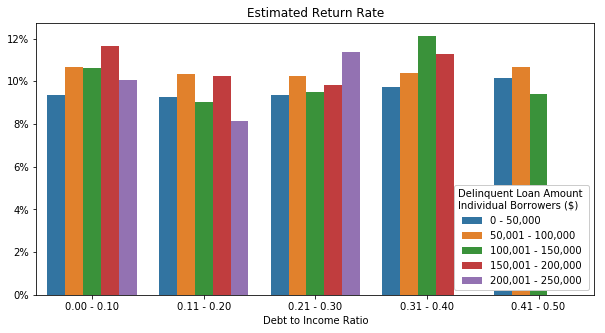

In [57]:
bivar_binned_barplot(loan_data_ret_mean, 'DebtRatioBin', 'AmtDelinquentBin', 'EstimatedReturn', bin_list_returns, 
                     'Estimated Return Rate', 'Debt to Income Ratio', 
                     '', 'Delinquent Loan Amount \nIndividual Borrowers ($)')